In [58]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.power as smp
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [59]:
# df = ds.search_all()
df = ds.get_db('GPT')
model_mask = df['round_'] == 5
df = df[model_mask]

df['gender_str'] = df['gender'].apply(lambda x: x.name)

In [60]:
m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_male, df_female = df[m_mask], df[f_mask]

In [61]:
deserved_group_df = pd.concat(
                    [df_male.value_counts('deserved_salary').sort_index(),
                      df_female.value_counts('deserved_salary').sort_index()],
                        axis=1).reset_index()
deserved_group_df.replace(np.nan, 0, inplace=True)
deserved_group_df = deserved_group_df.apply(lambda x: x.astype(int), axis=1)
deserved_group_df.columns = ['salary',	'male', 'female']

current_group_df = pd.concat(
                    [df_male.value_counts('current_salary').sort_index(),
                     df_female.value_counts('current_salary').sort_index()],
                        axis=1).reset_index()
current_group_df.replace(np.nan, 0, inplace=True)
current_group_df = current_group_df.apply(lambda x: x.astype(int), axis=1)
current_group_df.columns = ['salary',	'male', 'female']

display(deserved_group_df)
display(current_group_df)

,salary,male,female
0,75,16,35
1,78,1,0
2,80,37,55
3,82,1,4
4,85,234,253
5,89,1,0
6,90,117,98
7,92,1,1
8,95,72,43
9,100,13,2


,salary,male,female
0,55,17,33
1,56,1,0
2,57,3,0
3,58,2,6
4,58,1,0
5,60,70,101
6,61,1,0
7,62,6,12
8,63,5,5
9,65,172,187


In [62]:
observed_deserved = deserved_group_df[['male', 'female']].to_numpy()

observed_current = current_group_df[['male', 'female']].to_numpy()

chi2_stat_deserved, p_val_deserved, dof_deserved, expected_deserved = stats.chi2_contingency(observed_deserved)
print(f"Deserved Salary Chi-square Test:\nChi2 Stat: {chi2_stat_deserved}, P-value: {p_val_deserved}, Degrees of Freedom: {dof_deserved}")

chi2_stat_current, p_val_current, dof_current, expected_current = stats.chi2_contingency(observed_current)
print(f"Current Salary Chi-square Test:\nChi2 Stat: {chi2_stat_current}, P-value: {p_val_current}, Degrees of Freedom: {dof_current}")

Deserved Salary Chi-square Test:
Chi2 Stat: 37.199257930404016, P-value: 0.0011833921818461832, Degrees of Freedom: 15
Current Salary Chi-square Test:
Chi2 Stat: 59.77330016016317, P-value: 0.0002824523188390499, Degrees of Freedom: 27


In [63]:
# Calculating the residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)
print("Residuals:\n", residuals)

Residuals:
 [[-1.87715702e+00  1.87527516e+00]
 [ 7.08171256e-01 -7.07461310e-01]
 [-1.32083744e+00  1.31951329e+00]
 [-9.47572733e-01  9.46622785e-01]
 [-5.93445519e-01  5.92850586e-01]
 [ 7.08171256e-01 -7.07461310e-01]
 [ 9.27125856e-01 -9.26196406e-01]
 [ 1.00351242e-03 -1.00250639e-03]
 [ 1.92077258e+00 -1.91884700e+00]
 [ 2.01207221e+00 -2.01005510e+00]
 [ 7.08171256e-01 -7.07461310e-01]
 [ 1.73813450e-03 -1.73639201e-03]
 [ 1.00351242e-03 -1.00250639e-03]
 [-7.06752075e-01  7.06043551e-01]
 [-9.99498370e-01  9.98496366e-01]
 [-7.06752075e-01  7.06043551e-01]]


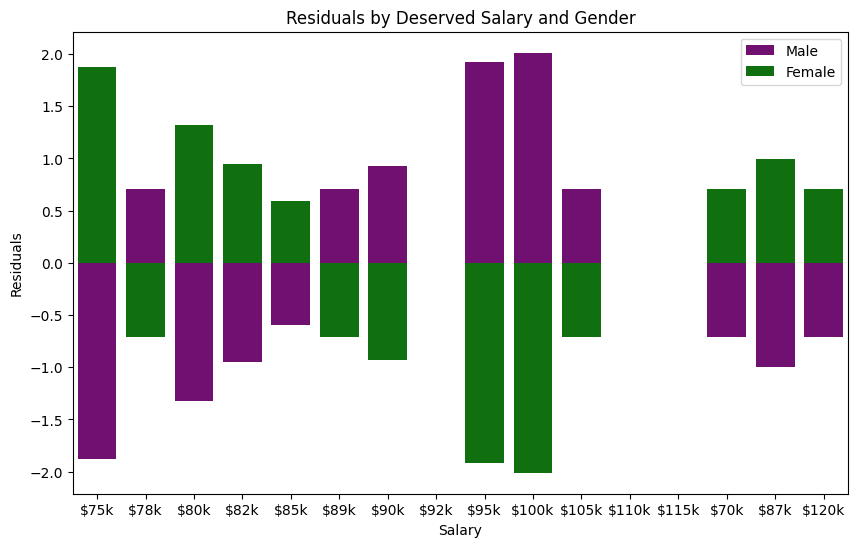

In [64]:
import seaborn as sns

ticks = [
    f'${salary}k' for salary in
    deserved_group_df['salary'].to_numpy()
    ]
male_residuals = residuals[:, 0]
female_residuals = residuals[:, 1]
plt.figure(figsize=(10, 6))
sns.barplot(x=ticks, y=male_residuals, color='purple', label='Male')
sns.barplot(x=ticks, y=female_residuals, color='green', label='Female')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()
plt.show()

In [65]:
total_men = deserved_group_df['male'].sum()
total_women = deserved_group_df['female'].sum()
proportions_men = [count / total_men for count in deserved_group_df['male']]
proportions_women = [count / total_women for count in deserved_group_df['female']]

print("Proportions of Men in Each Salary Category:", proportions_men)
print("Proportions of Women in Each Salary Category:", proportions_women)

Proportions of Men in Each Salary Category: [np.float64(0.0321285140562249), np.float64(0.002008032128514056), np.float64(0.07429718875502007), np.float64(0.002008032128514056), np.float64(0.46987951807228917), np.float64(0.002008032128514056), np.float64(0.23493975903614459), np.float64(0.002008032128514056), np.float64(0.14457831325301204), np.float64(0.02610441767068273), np.float64(0.002008032128514056), np.float64(0.006024096385542169), np.float64(0.002008032128514056), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Proportions of Women in Each Salary Category: [np.float64(0.07014028056112225), np.float64(0.0), np.float64(0.11022044088176353), np.float64(0.008016032064128256), np.float64(0.5070140280561122), np.float64(0.0), np.float64(0.1963927855711423), np.float64(0.002004008016032064), np.float64(0.08617234468937876), np.float64(0.004008016032064128), np.float64(0.0), np.float64(0.006012024048096192), np.float64(0.002004008016032064), np.float64(0.002004008016032064), np.f

In [66]:
deserved_group_df

,salary,male,female
0,75,16,35
1,78,1,0
2,80,37,55
3,82,1,4
4,85,234,253
5,89,1,0
6,90,117,98
7,92,1,1
8,95,72,43
9,100,13,2


In [70]:
from statsmodels.stats.proportion import proportions_ztest

nobs = np.array([total_men, total_women])
for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    stat, pval = proportions_ztest(count, nobs)
    print(f"\nSalary: {row['salary']}, Z-statistic: {stat}, P-value: {pval}")


Salary: 75, Z-statistic: -2.7239549450680984, P-value: 0.006450530559252489

Salary: 78, Z-statistic: 1.0015058982798282, P-value: 0.3165822899912438

Salary: 80, Z-statistic: -1.9596114413841972, P-value: 0.050041223058199955

Salary: 82, Z-statistic: -1.3427699218166758, P-value: 0.17934648566937839

Salary: 85, Z-statistic: -1.172845084865118, P-value: 0.24085793466773908

Salary: 89, Z-statistic: 1.0015058982798282, P-value: 0.3165822899912438

Salary: 90, Z-statistic: 1.479722241704897, P-value: 0.13894738742870674

Salary: 92, Z-statistic: 0.001419894564800072, P-value: 0.9988670884294554

Salary: 95, Z-statistic: 2.886599559200536, P-value: 0.0038942951795866445

Salary: 100, Z-statistic: 2.865713075422789, P-value: 0.00416071165111594

Salary: 105, Z-statistic: 1.0015058982798282, P-value: 0.3165822899912438

Salary: 110, Z-statistic: 0.0024642878583188035, P-value: 0.9980337847545176

Salary: 115, Z-statistic: 0.001419894564800072, P-value: 0.9988670884294554

Salary: 70, Z-s

In [71]:
from statsmodels.stats.power import zt_ind_solve_power
# Parameters
alpha = 0.05   # Significance level
power = 0.80   # Power of the test

for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    p1 = count[0]/total_men
    p2 = count[1]/total_women

    effect_size = abs(p1 - p2)

    # Calculate sample size per group
    sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size for salary group {row['salary']}: {sample_size}")

Required sample size for salary group 75: 10864.268763652153
Required sample size for salary group 78: 3893097.603512129
Required sample size for salary group 80: 12164.249342253486
Required sample size for salary group 82: 434887.34270778834
Required sample size for salary group 85: 11383.641534476263
Required sample size for salary group 89: 3893097.603512129
Required sample size for salary group 90: 10564.672453577026
Required sample size for salary group 92: 969385196371.5702
Required sample size for salary group 95: 4601.74072625682
Required sample size for salary group 100: 32150.926740328756
Required sample size for salary group 105: 3893097.603512129
Required sample size for salary group 110: 107709466263.50002
Required sample size for salary group 115: 969385196371.5702
Required sample size for salary group 70: 3908748.231367134
Required sample size for salary group 87: 977187.0578413748
Required sample size for salary group 120: 3908748.231367134


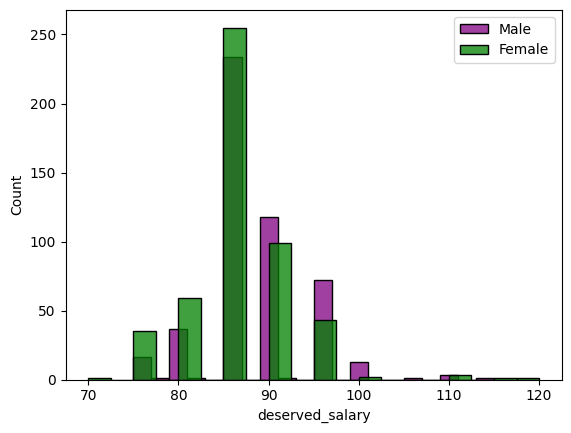

In [72]:
sns.histplot(df_male['deserved_salary'], color='purple', bins=20, label='Male')
sns.histplot(df_female['deserved_salary'], color='green', bins=20, label='Female')
plt.legend()